# Install & Import

In [1]:
!pip install -U scikit-learn
!pip install ppca
!pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import klib

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from ppca import PPCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import auc, roc_auc_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from imblearn.under_sampling import ClusterCentroids

import warnings
import sys

warnings.filterwarnings('ignore')

# Skenario 1: Klasifikasi + Normalisasi + Balancing Data

## KODE 1 NB + SCUT

In [5]:
# Membaca dataset dari file Excel
dataset = pd.read_excel('dataset_hepatitis.xlsx')

# Mengganti nilai ? dengan Nan
data = dataset.replace('?', np.nan)

# Mnghaus baris missing value
df = data.dropna()
df.to_excel('hasil_dropna.xlsx', index=False)

# Pisahkan atribut (x) dan target (y)
x = df.drop('class', axis=1)
y = df['class']

# Normalisasi dengan Standard Scaler
scaler = StandardScaler()
x_sc = pd.DataFrame(scaler.fit_transform(x.values), columns=x.columns)

# Membuat DataFrame dari hasil Standard Scaler
df_sc = pd.DataFrame(x_sc.values, columns=x_sc.columns)
df_sc['class'] = y
df_sc.to_excel('hasil_scaling.xlsx', index=False)

# Implementasi SCUT
class SCUT:
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters
        self.cluster_centroids = ClusterCentroids(random_state=0)

    def fit_resample(self, x_sc, y):
        kmeans = KMeans(n_clusters=self.n_clusters, random_state=0)
        cluster_labels = kmeans.fit_predict(x_sc, y)
        majority_cluster = np.argmax(np.bincount(cluster_labels))
        majority_samples = cluster_labels == majority_cluster
        X_majority = x_sc[majority_samples]
        y_majority = y[majority_samples]
        X_resampled, y_resampled = self.cluster_centroids.fit_resample(x_sc, y)
        X_resampled = np.concatenate([X_resampled, X_majority])
        y_resampled = np.concatenate([y_resampled, y_majority])
        return X_resampled, y_resampled

# Perform SCUT to balance classes
scut = SCUT(n_clusters=2)
x_res, y_res = scut.fit_resample(x_sc, y)

# Membuat DataFrame dari hasil SCUT
df_scut = pd.DataFrame(x_res, columns=x_sc.columns)
df_scut['class'] = y_res
df_scut.to_excel('hasil_scut.xlsx', index=False)

# Import fungsi split data dengan train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, stratify=y_res, test_size=0.3, random_state=0)

# Memanggil fungsi klasifikasi Naive bayes
gnb = GaussianNB()

# Memasukkan data training pada fungsi klasifikasi naive bayes
y_pred = gnb.fit(x_train, y_train).predict(x_test)

# Menampilkan nilai akurasi dari klasifikasi naive bayes
print('Nilai akurasi komposisi 70:30 adalah {:.2f}%'.format(metrics.accuracy_score(y_test, y_pred)*100))

Nilai akurasi komposisi 70:30 adalah 92.00%


## KODE 2 RF + SCUT

In [6]:
# Membaca dataset dari file Excel
dataset = pd.read_excel('dataset_hepatitis.xlsx')

# Mengganti nilai ? dengan Nan
data = dataset.replace('?', np.nan)

# Mnghaus baris missing value
df = data.dropna()
df.to_excel('hasil_dropna.xlsx', index=False)

# Pisahkan atribut (x) dan target (y)
x = df.drop('class', axis=1)
y = df['class']

# Normalisasi dengan Standard Scaler
scaler = StandardScaler()
x_sc = pd.DataFrame(scaler.fit_transform(x.values), columns=x.columns)

# Membuat DataFrame dari hasil Standard Scaler
df_sc = pd.DataFrame(x_sc.values, columns=x_sc.columns)
df_sc['class'] = y
df_sc.to_excel('hasil_scaling.xlsx', index=False)

# Implementasi SCUT
class SCUT:
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters
        self.cluster_centroids = ClusterCentroids(random_state=0)

    def fit_resample(self, X, y):
        kmeans = KMeans(n_clusters=self.n_clusters, random_state=0)
        cluster_labels = kmeans.fit_predict(X, y)
        majority_cluster = np.argmax(np.bincount(cluster_labels))
        majority_samples = cluster_labels == majority_cluster
        X_majority = X[majority_samples]
        y_majority = y[majority_samples]
        X_resampled, y_resampled = self.cluster_centroids.fit_resample(X, y)
        X_resampled = np.concatenate([X_resampled, X_majority])
        y_resampled = np.concatenate([y_resampled, y_majority])
        return X_resampled, y_resampled

# Perform SCUT to balance classes
scut = SCUT(n_clusters=2)
x_res, y_res = scut.fit_resample(x_sc, y)

# Membuat DataFrame dari hasil SCUT
df_scut = pd.DataFrame(x_res, columns=x_sc.columns)
df_scut['class'] = y_res
df_scut.to_excel('hasil_scut.xlsx', index=False)

# Import fungsi split data dengan train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, stratify=y_res, test_size=0.3, random_state=0)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0,
                            class_weight='balanced',
                            n_estimators=100)

# Memasukkan data training pada fungsi klasifikasi naive bayes
y_pred = rf.fit(x_train, y_train).predict(x_test)

# Menampilkan nilai akurasi dari klasifikasi naive bayes
print('Nilai akurasi komposisi 70:30 adalah {:.2f}%'.format(metrics.accuracy_score(y_test, y_pred)*100))

Nilai akurasi komposisi 70:30 adalah 92.00%


## KODE 3 NB + SMOTENC

In [7]:
# Membaca dataset dari file Excel
dataset = pd.read_excel('dataset_hepatitis.xlsx')

# Mengganti nilai ? dengan Nan
data = dataset.replace('?', np.nan)

# Mnghaus baris missing value
df = data.dropna()
df.to_excel('hasil_dropna.xlsx', index=False)

# Pisahkan atribut (x) dan target (y)
x = df.drop('class', axis=1)
y = df['class']

# Normalisasi dengan Standard Scaler
scaler = StandardScaler()
x_sc = pd.DataFrame(scaler.fit_transform(x.values), columns=x.columns)

# Membuat DataFrame dari hasil Standard Scaler
df_sc = pd.DataFrame(x_sc.values, columns=x_sc.columns)
df_sc['class'] = y
df_sc.to_excel('hasil_scaling.xlsx', index=False)

from imblearn.over_sampling import SMOTENC
# Perform SMOTEN to balance classes
sm = SMOTENC(categorical_features = [0,1,2,3,4,5,6,7,8,9,10,11,12],
             k_neighbors = 5,
             random_state = 0,
             sampling_strategy = 'minority')
x_res, y_res = sm.fit_resample(x_sc, y)

# Membuat DataFrame dari hasil SMOTE
df_smote = pd.DataFrame(x_res, columns=x_sc.columns)
df_smote['class'] = y_res
df_smote.to_excel('hasil_smote.xlsx', index=False)

# Import fungsi split data dengan train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, stratify=y_res, test_size=0.3, random_state=0)

# Memanggil fungsi klasifikasi Naive bayes
gnb = GaussianNB()

# Memasukkan data training pada fungsi klasifikasi naive bayes
y_pred = gnb.fit(x_train, y_train).predict(x_test)

# Menampilkan nilai akurasi dari klasifikasi naive bayes
print('Nilai akurasi komposisi 70:30 adalah {:.2f}%'.format(metrics.accuracy_score(y_test, y_pred)*100))

Nilai akurasi komposisi 70:30 adalah 100.00%


### RMSE

In [8]:
from sklearn.metrics import mean_squared_error

# Menghitung RMSE untuk setiap klasifikasi
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Menampilkan nilai RMSE
print('Nilai RMSE komposisi 70:30 adalah {:.2f}'.format(rmse))

Nilai RMSE komposisi 70:30 adalah 0.00


### Confusion Matrix

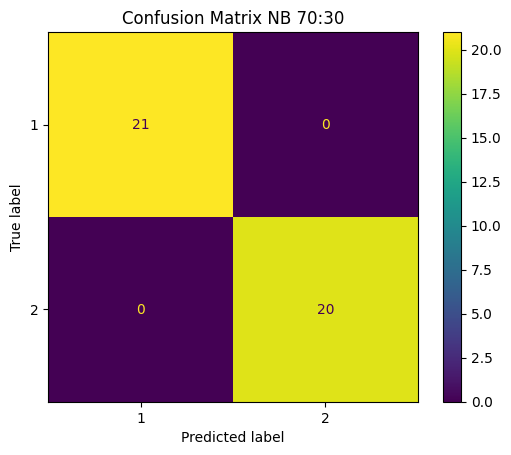

In [9]:
disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix
                                        (y_test, y_pred), 
                                        display_labels=gnb.classes_)
disp.plot()
plt.title('Confusion Matrix NB 70:30')
plt.show()
print()

### AUCROC

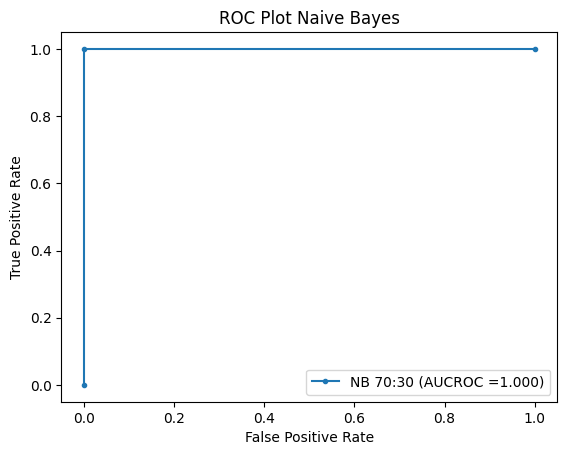

In [10]:
#plot ROC curve dengan matplotlib.pyplot
from sklearn.metrics import auc

y_dec = gnb.fit(x_train, y_train).predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_dec, pos_label=2)

plt.plot(fpr, tpr, marker='.', label="NB 70:30 (AUCROC ={:.3f})".format(auc(fpr, tpr)))

plt.title('ROC Plot Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## KODE 4 RF + SMOTENC

In [11]:
# Membaca dataset dari file Excel
dataset = pd.read_excel('dataset_hepatitis.xlsx')

# Mengganti nilai ? dengan Nan
data = dataset.replace('?', np.nan)

# Mnghaus baris missing value
df = data.dropna()
df.to_excel('hasil_dropna.xlsx', index=False)

# Pisahkan atribut (x) dan target (y)
x = df.drop('class', axis=1)
y = df['class']

# Normalisasi dengan Standard Scaler
scaler = StandardScaler()
x_sc = pd.DataFrame(scaler.fit_transform(x.values), columns=x.columns)

# Membuat DataFrame dari hasil Standard Scaler
df_sc = pd.DataFrame(x_sc.values, columns=x_sc.columns)
df_sc['class'] = y
df_sc.to_excel('hasil_scaling.xlsx', index=False)

from imblearn.over_sampling import SMOTENC
# Perform SMOTENC to balance classes
sm = SMOTENC(categorical_features = [0,1,2,3,4,5,6,7,8,9,10,11,12],
             k_neighbors = 5,
             random_state = 0,
             sampling_strategy = 'minority')
x_res, y_res = sm.fit_resample(x_sc, y)

# Membuat DataFrame dari hasil SMOTE
df_smote = pd.DataFrame(x_res, columns=x_sc.columns)
df_smote['class'] = y_res
df_smote.to_excel('hasil_smote.xlsx', index=False)

# Import fungsi split data dengan train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, stratify=y_res, test_size=0.3, random_state=0)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0,
                            class_weight='balanced',
                            n_estimators=100)

# Memasukkan data training pada fungsi klasifikasi naive bayes
y_pred = rf.fit(x_train, y_train).predict(x_test)

# Menampilkan nilai akurasi dari klasifikasi naive bayes
print('Nilai akurasi komposisi 70:30 adalah {:.2f}%'.format(metrics.accuracy_score(y_test, y_pred)*100))

Nilai akurasi komposisi 70:30 adalah 100.00%


### RMSE

In [12]:
from sklearn.metrics import mean_squared_error

# Menghitung RMSE untuk setiap klasifikasi
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Menampilkan nilai RMSE
print('Nilai RMSE komposisi 70:30 adalah {:.2f}'.format(rmse))

Nilai RMSE komposisi 70:30 adalah 0.00


### Confusion Matrix

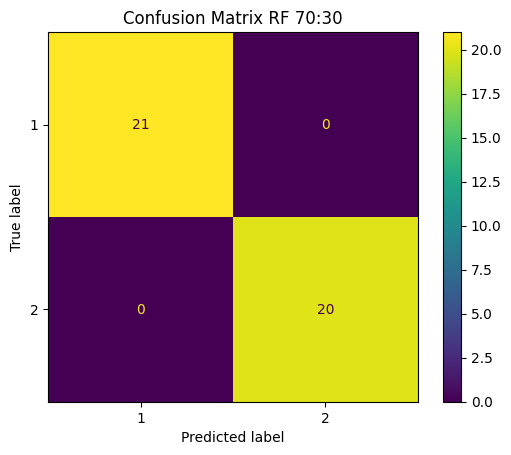

In [13]:
disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix
                                        (y_test, y_pred), 
                                        display_labels=rf.classes_)
disp.plot()
plt.title('Confusion Matrix RF 70:30')
plt.show()
print()

### AUCROC

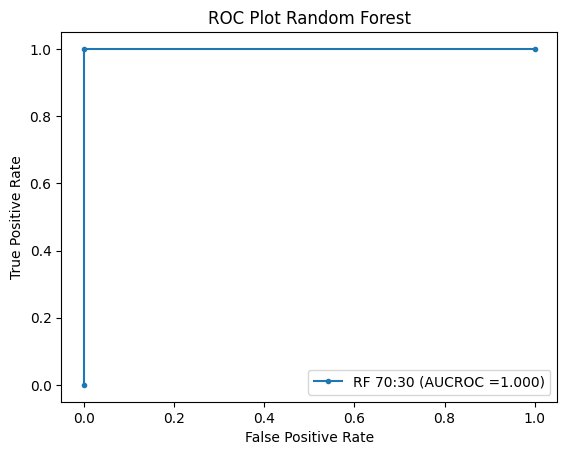

In [14]:
#plot ROC curve dengan matplotlib.pyplot
from sklearn.metrics import auc

y_dec = gnb.fit(x_train, y_train).predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_dec, pos_label=2)

plt.plot(fpr, tpr, marker='.', label="RF 70:30 (AUCROC ={:.3f})".format(auc(fpr, tpr)))

plt.title('ROC Plot Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Skenario 2: Klasifikasi + Imputasi + Normalisasi + Balancing Data

## KODE 1 NB + PPCA + SCUT

In [17]:
# Load dataset
df = pd.read_excel('dataset_hepatitis.xlsx')

# Split dataset into input and output variables
x = df.drop(['class'], axis=1)
y = df['class']

x = x.replace('?', np.nan)

# Menyatakan data kategorik dan numerik
cat_cols = ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
            'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
            'varices', 'histology']

num_cols = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']

# Mengisi nilai NaN dengan mode pada kolom kategorik
for col in cat_cols:
    x[col].fillna(x[col].mode()[0], inplace=True)

# Mengisi nilai NaN dengan mean pada kolom numerik
for col in num_cols:
    x[col].fillna(x[col].mean(), inplace=True)

x_pre = pd.concat([x[cat_cols], x[num_cols]], axis=1)

# Imputasi PPCA
imputer = PPCA()
imputer.fit(x_pre.values)
x_imputed = imputer.transform(x_pre.values)
x_imputed = pd.DataFrame(x_imputed, columns=x_pre.columns)

# Membuat DataFrame dari hasil imputasi PPCA
df_imputed = pd.DataFrame(x_imputed, columns=x_imputed.columns)
df_imputed['class'] = y
x_imp = df_imputed.drop(['class'], axis=1)
x_imp.to_excel('hasil_ppca.xlsx', index=False)

# Normalisasi dengan Standard Scaler
scaler = StandardScaler()
x_sc = pd.DataFrame(scaler.fit_transform(x_imp), columns=x_imp.columns)

# Membuat DataFrame dari hasil Standard Scaler
df_sc = pd.DataFrame(x_sc, columns=x_sc.columns)
df_sc['class'] = y
df_sc.to_excel('hasil_scaling.xlsx', index=False)

# Implementasi SCUT
class SCUT:
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters
        self.cluster_centroids = ClusterCentroids(random_state=0)

    def fit_resample(self, X, y):
        kmeans = KMeans(n_clusters=self.n_clusters, random_state=0)
        cluster_labels = kmeans.fit_predict(X, y)
        majority_cluster = np.argmax(np.bincount(cluster_labels))
        majority_samples = cluster_labels == majority_cluster
        X_majority = X[majority_samples]
        y_majority = y[majority_samples]
        X_resampled, y_resampled = self.cluster_centroids.fit_resample(X, y)
        X_resampled = np.concatenate([X_resampled, X_majority])
        y_resampled = np.concatenate([y_resampled, y_majority])
        return X_resampled, y_resampled

# Perform SCUT to balance classes
scut = SCUT(n_clusters=2)
x_res, y_res = scut.fit_resample(x_sc, y)

# Membuat DataFrame dari hasil SCUT
df_scut = pd.DataFrame(x_res, columns=x_sc.columns)
df_scut['class'] = y_res
df_scut.to_excel('hasil_scut.xlsx', index=False)

# Import fungsi split data dengan train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, stratify=y_res, test_size=0.3, random_state=0)

# Memanggil fungsi klasifikasi Naive bayes
gnb = GaussianNB()

# Memasukkan data training pada fungsi klasifikasi naive bayes
y_pred = gnb.fit(x_train, y_train).predict(x_test)

# Menampilkan nilai akurasi dari klasifikasi naive bayes
print('Nilai akurasi komposisi 70:30 adalah {:.2f}%'.format(metrics.accuracy_score(y_test, y_pred)*100))

Nilai akurasi komposisi 70:30 adalah 100.00%


## KODE 2 RF + PPCA + SCUT 

In [18]:
# Load dataset
df = pd.read_excel('dataset_hepatitis.xlsx')

# Split dataset into input and output variables
x = df.drop(['class'], axis=1)
y = df['class']

x = x.replace('?', np.nan)

# Menyatakan data kategorik dan numerik
cat_cols = ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
            'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
            'varices', 'histology']

num_cols = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']

# Mengisi nilai NaN dengan mode pada kolom kategorik
for col in cat_cols:
    x[col].fillna(x[col].mode()[0], inplace=True)

# Mengisi nilai NaN dengan mean pada kolom numerik
for col in num_cols:
    x[col].fillna(x[col].mean(), inplace=True)

x_pre = pd.concat([x[cat_cols], x[num_cols]], axis=1)

# Normalisasi dengan Standard Scaler
scaler = StandardScaler()
x_sc = pd.DataFrame(scaler.fit_transform(x_pre), columns=x_pre.columns)

# Membuat DataFrame dari hasil Standard Scaler
df_sc = pd.DataFrame(x_sc, columns=x_sc.columns)
df_sc['class'] = y
df_sc.to_excel('hasil_scaling.xlsx', index=False)

# Imputasi PPCA
imputer = PPCA()
imputer.fit(x_sc.values)
x_imputed = imputer.transform(x_sc.values)
x_imputed = pd.DataFrame(x_imputed, columns=x_sc.columns)

# Membuat DataFrame dari hasil imputasi PPCA
df_imputed = pd.DataFrame(x_imputed, columns=x_imputed.columns)
df_imputed['class'] = y
x_imp = df_imputed.drop(['class'], axis=1)
x_imp.to_excel('hasil_ppca.xlsx', index=False)

# Implementasi SCUT
class SCUT:
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters
        self.cluster_centroids = ClusterCentroids(random_state=0)

    def fit_resample(self, X, y):
        kmeans = KMeans(n_clusters=self.n_clusters, random_state=0)
        cluster_labels = kmeans.fit_predict(X, y)
        majority_cluster = np.argmax(np.bincount(cluster_labels))
        majority_samples = cluster_labels == majority_cluster
        X_majority = X[majority_samples]
        y_majority = y[majority_samples]
        X_resampled, y_resampled = self.cluster_centroids.fit_resample(X, y)
        X_resampled = np.concatenate([X_resampled, X_majority])
        y_resampled = np.concatenate([y_resampled, y_majority])
        return X_resampled, y_resampled

# Perform SCUT to balance classes
scut = SCUT(n_clusters=2)
x_res, y_res = scut.fit_resample(x_imp, y)

# Membuat DataFrame dari hasil SCUT
df_scut = pd.DataFrame(x_res, columns=x_imp.columns)
df_scut['class'] = y_res
df_scut.to_excel('hasil_scut.xlsx', index=False)

# Import fungsi split data dengan train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, stratify=y_res, test_size=0.3, random_state=0)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0,
                            class_weight='balanced',
                            n_estimators=100)

# Memasukkan data training pada fungsi klasifikasi naive bayes
y_pred = rf.fit(x_train, y_train).predict(x_test)

# Menampilkan nilai akurasi dari klasifikasi naive bayes
print('Nilai akurasi komposisi 70:30 adalah {:.2f}%'.format(metrics.accuracy_score(y_test, y_pred)*100))

Nilai akurasi komposisi 70:30 adalah 87.76%


## KODE 3 NB + PPCA + SMOTENC

In [19]:
# Load dataset
df = pd.read_excel('dataset_hepatitis.xlsx')

# Split dataset into input and output variables
x = df.drop(['class'], axis=1)
y = df['class']

x = x.replace('?', np.nan)

# Menyatakan data kategorik dan numerik
cat_cols = ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
            'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
            'varices', 'histology']

num_cols = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']

# Mengisi nilai NaN dengan mode pada kolom kategorik
for col in cat_cols:
    x[col].fillna(x[col].mode()[0], inplace=True)

# Mengisi nilai NaN dengan mean pada kolom numerik
for col in num_cols:
    x[col].fillna(x[col].mean(), inplace=True)

x_pre = pd.concat([x[cat_cols], x[num_cols]], axis=1)

# Imputasi PPCA
imputer = PPCA()
imputer.fit(x_pre.values)
x_imputed = imputer.transform(x_pre.values)
x_imputed = pd.DataFrame(x_imputed, columns=x_pre.columns)

# Membuat DataFrame dari hasil imputasi PPCA
df_imputed = pd.DataFrame(x_imputed, columns=x_imputed.columns)
df_imputed['class'] = y
x_imp = df_imputed.drop(['class'], axis=1)
x_imp.to_excel('hasil_ppca.xlsx', index=False)

# Normalisasi dengan Standard Scaler
scaler = StandardScaler()
x_sc = pd.DataFrame(scaler.fit_transform(x_imp), columns=x_imp.columns)

# Membuat DataFrame dari hasil Standard Scaler
df_sc = pd.DataFrame(x_sc, columns=x_sc.columns)
df_sc['class'] = y
df_sc.to_excel('hasil_scaling.xlsx', index=False)

from imblearn.over_sampling import SMOTENC
# Perform SMOTEN to balance classes
sm = SMOTENC(categorical_features = [0,1,2,3,4,5,6,7,8,9,10,11,12],
             k_neighbors = 5,
             random_state = 0,
             sampling_strategy = 'minority')
x_res, y_res = sm.fit_resample(x_sc, y)

# Membuat DataFrame dari hasil SMOTE
df_smote = pd.DataFrame(x_res, columns=x_sc.columns)
df_smote['class'] = y_res
df_smote.to_excel('hasil_smote.xlsx', index=False)

# Import fungsi split data dengan train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, stratify=y_res, test_size=0.3, random_state=0)

# Memanggil fungsi klasifikasi Naive bayes
gnb = GaussianNB()

# Memasukkan data training pada fungsi klasifikasi naive bayes
y_pred = gnb.fit(x_train, y_train).predict(x_test)

# Menampilkan nilai akurasi dari klasifikasi naive bayes
print('Nilai akurasi komposisi 70:30 adalah {:.2f}%'.format(metrics.accuracy_score(y_test, y_pred)*100))

Nilai akurasi komposisi 70:30 adalah 100.00%


### RMSE

In [20]:
from sklearn.metrics import mean_squared_error

# Menghitung RMSE untuk setiap klasifikasi
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Menampilkan nilai RMSE
print('Nilai RMSE komposisi 70:30 adalah {:.2f}'.format(rmse))

Nilai RMSE komposisi 70:30 adalah 0.00


### Confusion Matrix

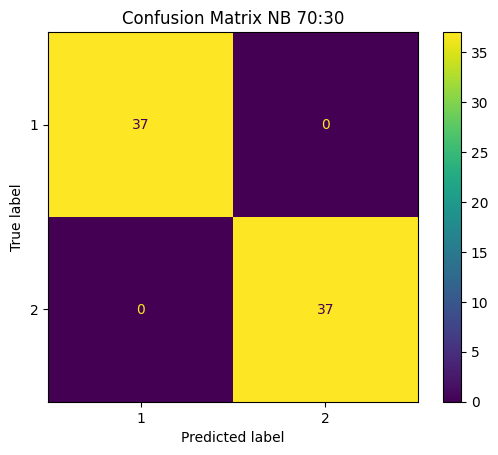

In [21]:
disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix
                                        (y_test, y_pred), 
                                        display_labels=gnb.classes_)
disp.plot()
plt.title('Confusion Matrix NB 70:30')
plt.show()
print()

### AUCROC

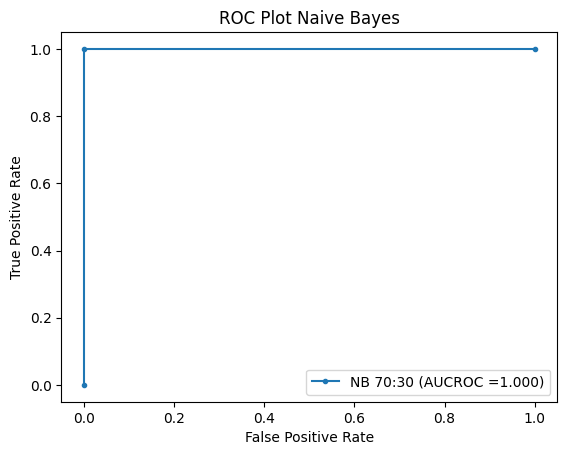

In [22]:
#plot ROC curve dengan matplotlib.pyplot
from sklearn.metrics import auc

y_dec = gnb.fit(x_train, y_train).predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_dec, pos_label=2)

plt.plot(fpr, tpr, marker='.', label="NB 70:30 (AUCROC ={:.3f})".format(auc(fpr, tpr)))

plt.title('ROC Plot Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## KODE 4 RF + PPCA + SMOTENC

In [23]:
# Load dataset
df = pd.read_excel('dataset_hepatitis.xlsx')

# Split dataset into input and output variables
x = df.drop(['class'], axis=1)
y = df['class']

x = x.replace('?', np.nan)

# Menyatakan data kategorik dan numerik
cat_cols = ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
            'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
            'varices', 'histology']

num_cols = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']

# Mengisi nilai NaN dengan mode pada kolom kategorik
for col in cat_cols:
    x[col].fillna(x[col].mode()[0], inplace=True)

# Mengisi nilai NaN dengan mean pada kolom numerik
for col in num_cols:
    x[col].fillna(x[col].mean(), inplace=True)

x_pre = pd.concat([x[cat_cols], x[num_cols]], axis=1)

# Normalisasi dengan Standard Scaler
scaler = StandardScaler()
x_sc = pd.DataFrame(scaler.fit_transform(x_pre), columns=x_pre.columns)

# Membuat DataFrame dari hasil Standard Scaler
df_sc = pd.DataFrame(x_sc, columns=x_sc.columns)
df_sc['class'] = y
df_sc.to_excel('hasil_scaling.xlsx', index=False)

# Imputasi PPCA
imputer = PPCA()
imputer.fit(x_sc.values)
x_imputed = imputer.transform(x_sc.values)
x_imputed = pd.DataFrame(x_imputed, columns=x_sc.columns)

# Membuat DataFrame dari hasil imputasi PPCA
df_imputed = pd.DataFrame(x_imputed, columns=x_imputed.columns)
df_imputed['class'] = y
x_imp = df_imputed.drop(['class'], axis=1)
x_imp.to_excel('hasil_ppca.xlsx', index=False)

from imblearn.over_sampling import SMOTENC
# Perform SMOTEN to balance classes
sm = SMOTENC(categorical_features = [0,1,2,3,4,5,6,7,8,9,10,11,12],
             k_neighbors = 5,
             random_state = 0,
             sampling_strategy = 'minority')
x_res, y_res = sm.fit_resample(x_imp, y)

# Membuat DataFrame dari hasil SMOTE
df_smote = pd.DataFrame(x_res, columns=x_imputed.columns)
df_smote['class'] = y_res
df_smote.to_excel('hasil_smote.xlsx', index=False)

# Import fungsi split data dengan train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, stratify=y_res, test_size=0.3, random_state=0)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0,
                            class_weight='balanced',
                            n_estimators=100)

# Memasukkan data training pada fungsi klasifikasi naive bayes
y_pred = rf.fit(x_train, y_train).predict(x_test)

# Menampilkan nilai akurasi dari klasifikasi naive bayes
print('Nilai akurasi komposisi 70:30 adalah {:.2f}%'.format(metrics.accuracy_score(y_test, y_pred)*100))

Nilai akurasi komposisi 70:30 adalah 89.19%


### RMSE

In [24]:
from sklearn.metrics import mean_squared_error

# Menghitung RMSE untuk setiap klasifikasi
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Menampilkan nilai RMSE
print('Nilai RMSE komposisi 70:30 adalah {:.2f}'.format(rmse))

Nilai RMSE komposisi 70:30 adalah 0.33


### Confusion Matrix

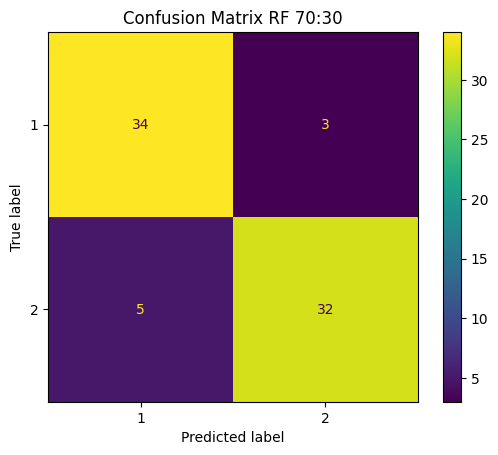

In [25]:
disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix
                                        (y_test, y_pred), 
                                        display_labels=rf.classes_)
disp.plot()
plt.title('Confusion Matrix RF 70:30')
plt.show()
print()

### AUCROC

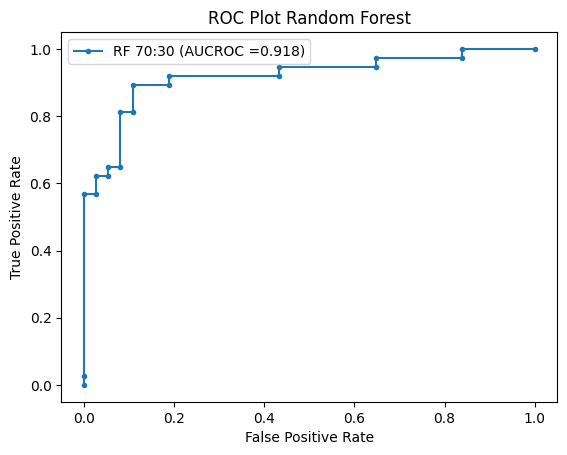

In [26]:
#plot ROC curve dengan matplotlib.pyplot
from sklearn.metrics import auc

y_dec = gnb.fit(x_train, y_train).predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_dec, pos_label=2)

plt.plot(fpr, tpr, marker='.', label="RF 70:30 (AUCROC ={:.3f})".format(auc(fpr, tpr)))

plt.title('ROC Plot Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Skenario 3: Klasifikasi + Normalisasi + Balancing Data

## Kode 1 NB + SCUT + Standard Scaler 

In [27]:
# Membaca dataset dari file Excel
dataset = pd.read_excel('dataset_hepatitis.xlsx')

# Mengganti nilai ? dengan NaN
data = dataset.replace('?', np.nan)

# Menghapus baris yang memiliki missing value
df = data.dropna()
df.to_excel('hasil_dropna.xlsx', index=False)

# Pisahkan atribut (x) dan target (y)
x = df.drop(['class'], axis=1)
y = df['class']

# Import fungsi split data dengan train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

# Normalisasi dengan Standard Scaler
scaler = StandardScaler()
x_train_sc = pd.DataFrame(scaler.fit_transform(x_train.values), columns=x_train.columns)
x_test_sc = pd.DataFrame(scaler.transform(x_test.values), columns=x_test.columns)

# Membuat DataFrame dari hasil Standard Scaler
df_train_sc = pd.DataFrame(x_train_sc.values, columns=x_train_sc.columns)
df_train_sc['class'] = y_train
df_train_sc.to_excel('hasil_scaling_train.xlsx', index=False)

df_test_sc = pd.DataFrame(x_test_sc.values, columns=x_test_sc.columns)
df_test_sc['class'] = y_test
df_test_sc.to_excel('hasil_scaling_test.xlsx', index=False)

# Implementasi SCUT
class SCUT:
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters
        self.cluster_centroids = ClusterCentroids(random_state=0)

    def fit_resample(self, X, y):
        kmeans = KMeans(n_clusters=self.n_clusters, random_state=0)
        cluster_labels = kmeans.fit_predict(X, y)
        majority_cluster = np.argmax(np.bincount(cluster_labels))
        majority_samples = cluster_labels == majority_cluster
        X_majority = X[majority_samples]
        y_majority = y[majority_samples]
        X_resampled, y_resampled = self.cluster_centroids.fit_resample(X, y)
        X_resampled = np.concatenate([X_resampled, X_majority])
        y_resampled = np.concatenate([y_resampled, y_majority])
        return X_resampled, y_resampled

# Perform SCUT to balance classes on training data
scut = SCUT(n_clusters=2)
x_train_res, y_train_res = scut.fit_resample(x_train_sc, y_train)

# Membuat DataFrame dari hasil SCUT
df_train_scut = pd.DataFrame(x_train_res, columns=x_train_sc.columns)
df_train_scut['class'] = y_train_res
df_train_scut.to_excel('hasil_scut_train.xlsx', index=False)

# Memanggil fungsi klasifikasi Naive Bayes
gnb = GaussianNB()

# Memasukkan data training pada fungsi klasifikasi naive bayes
y_pred = gnb.fit(x_train_res, y_train_res).predict(x_test_sc)

# Menampilkan nilai akurasi dari klasifikasi naive bayes
print('Nilai akurasi komposisi 70:30 adalah {:.2f}%'.format(metrics.accuracy_score(y_test, y_pred)*100))

Nilai akurasi komposisi 70:30 adalah 87.50%


## Kode 2 NB + SMOTENC + Standard Scaler

In [28]:
# Membaca dataset dari file Excel
dataset = pd.read_excel('dataset_hepatitis.xlsx')

# Mengganti nilai ? dengan NaN
data = dataset.replace('?', np.nan)

# Menghapus baris yang memiliki missing value
df = data.dropna()
df.to_excel('hasil_dropna.xlsx', index=False)

# Pisahkan atribut (x) dan target (y)
x = df.drop(['class'], axis=1)
y = df['class']

# Import fungsi split data dengan train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

# Normalisasi dengan Standard Scaler
scaler = StandardScaler()
x_train_sc = pd.DataFrame(scaler.fit_transform(x_train.values), columns=x_train.columns)
x_test_sc = pd.DataFrame(scaler.transform(x_test.values), columns=x_test.columns)

# Membuat DataFrame dari hasil Standard Scaler
df_train_sc = pd.DataFrame(x_train_sc.values, columns=x_train_sc.columns)
df_train_sc['class'] = y_train
df_train_sc.to_excel('hasil_scaling_train.xlsx', index=False)

df_test_sc = pd.DataFrame(x_test_sc.values, columns=x_test_sc.columns)
df_test_sc['class'] = y_test
df_test_sc.to_excel('hasil_scaling_test.xlsx', index=False)

from imblearn.over_sampling import SMOTENC, SMOTEN
sm = SMOTENC(categorical_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18],
             k_neighbors = 2,
             random_state = 0,
             sampling_strategy = 'minority')

# Membuat DataFrame dari hasil SMOTENC pada data training
x_train_res, y_train_res = sm.fit_resample(x_train_sc.values, y_train)
df_train_sm = pd.DataFrame(x_train_res, columns=x_train_sc.columns)
df_train_sm['class'] = y_train_res
df_train_sm.to_excel('hasil_smotenc_train.xlsx', index=False)

# Perform SMOTENC pada data testing untuk menyeimbangkan kelas
x_test_res, y_test_res = sm.fit_resample(x_test_sc.values, y_test)
df_test_sm = pd.DataFrame(x_test_res, columns=x_test_sc.columns)
df_test_sm['class'] = y_test_res
df_test_sm.to_excel('hasil_smotenc_test.xlsx', index=False)

# Memanggil fungsi klasifikasi Naive Bayes
gnb = GaussianNB()

# Memasukkan data training pada fungsi klasifikasi naive bayes
y_pred = gnb.fit(x_train_res, y_train_res).predict(x_test_sc)

# Menampilkan nilai akurasi dari klasifikasi naive bayes
print('Nilai akurasi komposisi 70:30 adalah {:.2f}%'.format(metrics.accuracy_score(y_test, y_pred)*100))

Nilai akurasi komposisi 70:30 adalah 87.50%


## Kode 3 RF + SCUT + Standard Scaler

In [29]:
# Membaca dataset dari file Excel
dataset = pd.read_excel('dataset_hepatitis.xlsx')

# Mengganti nilai ? dengan NaN
data = dataset.replace('?', np.nan)

# Menghapus baris yang memiliki missing value
df = data.dropna()
df.to_excel('hasil_dropna.xlsx', index=False)

# Pisahkan atribut (x) dan target (y)
x = df.drop(['class'], axis=1)
y = df['class']

# Import fungsi split data dengan train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

# Normalisasi dengan Standard Scaler
scaler = StandardScaler()
x_train_sc = pd.DataFrame(scaler.fit_transform(x_train.values), columns=x_train.columns)
x_test_sc = pd.DataFrame(scaler.transform(x_test.values), columns=x_test.columns)

# Membuat DataFrame dari hasil Standard Scaler
df_train_sc = pd.DataFrame(x_train_sc.values, columns=x_train_sc.columns)
df_train_sc['class'] = y_train
df_train_sc.to_excel('hasil_scaling_train.xlsx', index=False)

df_test_sc = pd.DataFrame(x_test_sc.values, columns=x_test_sc.columns)
df_test_sc['class'] = y_test
df_test_sc.to_excel('hasil_scaling_test.xlsx', index=False)

# Implementasi SCUT
class SCUT:
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters
        self.cluster_centroids = ClusterCentroids(random_state=0)

    def fit_resample(self, X, y):
        kmeans = KMeans(n_clusters=self.n_clusters, random_state=0)
        cluster_labels = kmeans.fit_predict(X, y)
        majority_cluster = np.argmax(np.bincount(cluster_labels))
        majority_samples = cluster_labels == majority_cluster
        X_majority = X[majority_samples]
        y_majority = y[majority_samples]
        X_resampled, y_resampled = self.cluster_centroids.fit_resample(X, y)
        X_resampled = np.concatenate([X_resampled, X_majority])
        y_resampled = np.concatenate([y_resampled, y_majority])
        return X_resampled, y_resampled

# Perform SCUT to balance classes on training data
scut = SCUT(n_clusters=2)
x_train_res, y_train_res = scut.fit_resample(x_train_sc, y_train)

# Membuat DataFrame dari hasil SCUT
df_train_scut = pd.DataFrame(x_train_res, columns=x_train_sc.columns)
df_train_scut['class'] = y_train_res
df_train_scut.to_excel('hasil_scut_train.xlsx', index=False)

# Memanggil fungsi klasifikasi Naive Bayes
rf = RandomForestClassifier(random_state=0, 
                            class_weight='balanced',
                            n_estimators=100)

# Memasukkan data training pada fungsi klasifikasi naive bayes
y_pred = rf.fit(x_train_res, y_train_res).predict(x_test_sc)

# Menampilkan nilai akurasi dari klasifikasi naive bayes
print('Nilai akurasi komposisi 70:30 adalah {:.2f}%'.format(metrics.accuracy_score(y_test, y_pred)*100))

Nilai akurasi komposisi 70:30 adalah 91.67%


## Kode 4 RF + SMOTENC + Standard Scaler

In [30]:
# Membaca dataset dari file Excel
dataset = pd.read_excel('dataset_hepatitis.xlsx')

# Mengganti nilai ? dengan NaN
data = dataset.replace('?', np.nan)

# Menghapus baris yang memiliki missing value
df = data.dropna()
df.to_excel('hasil_dropna.xlsx', index=False)

# Pisahkan atribut (x) dan target (y)
x = df.drop(['class'], axis=1)
y = df['class']

# Import fungsi split data dengan train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

# Normalisasi dengan Standard Scaler
scaler = StandardScaler()
x_train_sc = pd.DataFrame(scaler.fit_transform(x_train.values), columns=x_train.columns)
x_test_sc = pd.DataFrame(scaler.transform(x_test.values), columns=x_test.columns)

# Membuat DataFrame dari hasil Standard Scaler
df_train_sc = pd.DataFrame(x_train_sc.values, columns=x_train_sc.columns)
df_train_sc['class'] = y_train
df_train_sc.to_excel('hasil_scaling_train.xlsx', index=False)

df_test_sc = pd.DataFrame(x_test_sc.values, columns=x_test_sc.columns)
df_test_sc['class'] = y_test
df_test_sc.to_excel('hasil_scaling_test.xlsx', index=False)

from imblearn.over_sampling import SMOTENC, SMOTEN
sm = SMOTENC(categorical_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18],
             k_neighbors = 2,
             random_state = 0,
             sampling_strategy = 'minority')

# Membuat DataFrame dari hasil SMOTENC pada data training
x_train_res, y_train_res = sm.fit_resample(x_train_sc.values, y_train)
df_train_sm = pd.DataFrame(x_train_res, columns=x_train_sc.columns)
df_train_sm['class'] = y_train_res
df_train_sm.to_excel('hasil_smotenc_train.xlsx', index=False)

# Perform SMOTENC pada data testing untuk menyeimbangkan kelas
x_test_res, y_test_res = sm.fit_resample(x_test_sc.values, y_test)
df_test_sm = pd.DataFrame(x_test_res, columns=x_test_sc.columns)
df_test_sm['class'] = y_test_res
df_test_sm.to_excel('hasil_smotenc_test.xlsx', index=False)

# Memanggil fungsi klasifikasi Naive Bayes
rf = RandomForestClassifier(random_state=0, 
                            class_weight='balanced',
                            n_estimators=100)

# Memasukkan data training pada fungsi klasifikasi naive bayes
y_pred = rf.fit(x_train_res, y_train_res).predict(x_test_sc)

# Menampilkan nilai akurasi dari klasifikasi naive bayes
print('Nilai akurasi komposisi 70:30 adalah {:.2f}%'.format(metrics.accuracy_score(y_test, y_pred)*100))

Nilai akurasi komposisi 70:30 adalah 83.33%


# Skenario 4: Klasifikasi + Imputasi + Normalisasi + Balancing Data

## Kode 1 NB + PPCA + SCUT + Standard Scaler

In [31]:
# Load dataset
dataset = pd.read_excel('dataset_hepatitis.xlsx')

# Mengganti nilai ? dengan Nan
df = dataset.replace('?', np.nan)

# Split dataset into input and output variables
x = df.drop(['class'], axis=1)
y = df['class']

# Import train_test_split func
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

# Menyatakan data kategorik dan numerik
cat_cols = ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
            'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
            'varices', 'histology']

num_cols = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']

# Mengisi nilai NaN dengan mode pada kolom kategorik pada data training
for col in cat_cols:
    x_train[col].fillna(x_train[col].mode()[0], inplace=True)

# Mengisi nilai NaN dengan mean pada kolom numerik pada data training
for col in num_cols:
    x_train[col].fillna(x_train[col].mean(), inplace=True)

# Normalisasi dengan Standard Scaler pada data training
scaler = StandardScaler()
x_train_sc = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)

# Mengisi nilai NaN dengan mode pada kolom kategorik pada data testing
for col in cat_cols:
    x_test[col].fillna(x_train[col].mode()[0], inplace=True)

# Mengisi nilai NaN dengan mean pada kolom numerik pada data testing
for col in num_cols:
    if col in x_test.columns:
        x_test[col].fillna(x_train[col].mean(), inplace=True)

# Normalisasi dengan Standard Scaler pada data testing
x_test_sc = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

# Membuat DataFrame dari hasil Standard Scaler pada data training
df_train_sc = pd.concat([x_train_sc, y_train], axis=1)
df_train_sc.to_excel('hasil_scaling_train.xlsx', index=False)

# Membuat DataFrame dari hasil Standard Scaler pada data testing
df_test_sc = pd.concat([x_test_sc, y_test], axis=1)
df_test_sc.to_excel('hasil_scaling_test.xlsx', index=False)

# Imputasi PPCA pada data training
imputer = PPCA()
imputer.fit(x_train_sc.values)
x_train_imputed = imputer.transform(x_train_sc.values)
x_train_imputed = pd.DataFrame(x_train_imputed, columns=x_train_sc.columns)

# Membuat DataFrame dari hasil imputasi PPCA pada data training
df_train_imputed = pd.concat([x_train_imputed, y_train], axis=1)
df_train_imputed.to_excel('hasil_ppca_train.xlsx', index=False)

# Imputasi PPCA pada data testing
x_test_imputed = imputer.transform(x_test_sc.values)
x_test_imputed = pd.DataFrame(x_test_imputed, columns=x_test_sc.columns)

# Membuat DataFrame dari hasil imputasi PPCA pada data testing
df_test_imputed = pd.concat([x_test_imputed, y_test], axis=1)
df_test_imputed.to_excel('hasil_ppca_test.xlsx', index=False)

# Implementasi SCUT pada data training
class SCUT:
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters
        self.cluster_centroids = ClusterCentroids(random_state=0)

    def fit_resample(self, X, y):
        kmeans = KMeans(n_clusters=self.n_clusters, random_state=0)
        cluster_labels = kmeans.fit_predict(X, y)
        majority_cluster = np.argmax(np.bincount(cluster_labels))
        majority_samples = cluster_labels == majority_cluster
        X_majority = X[majority_samples]
        y_majority = y[majority_samples]
        X_resampled, y_resampled = self.cluster_centroids.fit_resample(X, y)
        X_resampled = np.concatenate([X_resampled, X_majority])
        y_resampled = np.concatenate([y_resampled, y_majority])
        return X_resampled, y_resampled

# Perform SCUT pada data training untuk menyeimbangkan kelas
scut = SCUT(n_clusters=2)
x_train_res, y_train_res = scut.fit_resample(x_train_imputed.values, y_train)

# Membuat DataFrame dari hasil SCUT pada data training
df_train_scut = pd.DataFrame(x_train_res, columns=x_train_imputed.columns)
df_train_scut['class'] = y_train_res
df_train_scut.to_excel('hasil_scut_train.xlsx', index=False)

# Perform SCUT pada data testing untuk menyeimbangkan kelas
x_test_res, y_test_res = scut.fit_resample(x_test_imputed.values, y_test)
df_test_scut = pd.DataFrame(x_test_res, columns=x_test_imputed.columns)
df_test_scut['class'] = y_test_res
df_test_scut.to_excel('hasil_scut_test.xlsx', index=False)

# Memanggil fungsi klasifikasi Naive Bayes
gnb = GaussianNB()

# Memasukkan data training pada fungsi klasifikasi Naive Bayes
y_pred = gnb.fit(x_train_res, y_train_res).predict(x_test_res)

# Menampilkan nilai akurasi dari klasifikasi Naive Bayes
print('Nilai akurasi komposisi 70:30 adalah {:.2f}%'.format(metrics.accuracy_score(y_test_res, y_pred)*100))

Nilai akurasi komposisi 70:30 adalah 80.00%


## Kode 2 NB + PPCA + SMOTENC + Standard Scaler

In [32]:
# Load dataset
dataset = pd.read_excel('dataset_hepatitis.xlsx')

# Mengganti nilai ? dengan Nan
df = dataset.replace('?', np.nan)

# Split dataset into input and output variables
x = df.drop(['class'], axis=1)
y = df['class']

# Import train_test_split func
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=42)

# Menyatakan data kategorik dan numerik
cat_cols = ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
            'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
            'varices', 'histology']

num_cols = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']

# Mengisi nilai NaN dengan mode pada kolom kategorik pada data training
for col in cat_cols:
    x_train[col].fillna(x_train[col].mode()[0], inplace=True)

# Mengisi nilai NaN dengan mean pada kolom numerik pada data training
for col in num_cols:
    x_train[col].fillna(x_train[col].mean(), inplace=True)

# Normalisasi dengan Standard Scaler pada data training
scaler = StandardScaler()
x_train_sc = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)

# Mengisi nilai NaN dengan mode pada kolom kategorik pada data testing
for col in cat_cols:
    x_test[col].fillna(x_train[col].mode()[0], inplace=True)

# Mengisi nilai NaN dengan mean pada kolom numerik pada data testing
for col in num_cols:
    if col in x_test.columns:
        x_test[col].fillna(x_train[col].mean(), inplace=True)

# Normalisasi dengan Standard Scaler pada data testing
x_test_sc = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

# Membuat DataFrame dari hasil Standard Scaler pada data training
df_train_sc = pd.concat([x_train_sc, y_train], axis=1)
df_train_sc.to_excel('hasil_scaling_train.xlsx', index=False)

# Membuat DataFrame dari hasil Standard Scaler pada data testing
df_test_sc = pd.concat([x_test_sc, y_test], axis=1)
df_test_sc.to_excel('hasil_scaling_test.xlsx', index=False)

# Imputasi PPCA pada data training
imputer = PPCA()
imputer.fit(x_train_sc.values)
x_train_imputed = imputer.transform(x_train_sc.values)
x_train_imputed = pd.DataFrame(x_train_imputed, columns=x_train_sc.columns)

# Membuat DataFrame dari hasil imputasi PPCA pada data training
df_train_imputed = pd.concat([x_train_imputed, y_train], axis=1)
df_train_imputed.to_excel('hasil_ppca_train.xlsx', index=False)

# Imputasi PPCA pada data testing
x_test_imputed = imputer.transform(x_test_sc.values)
x_test_imputed = pd.DataFrame(x_test_imputed, columns=x_test_sc.columns)

# Membuat DataFrame dari hasil imputasi PPCA pada data testing
df_test_imputed = pd.concat([x_test_imputed, y_test], axis=1)
df_test_imputed.to_excel('hasil_ppca_test.xlsx', index=False)

from imblearn.over_sampling import SMOTENC
# Perform SMOTEN to balance classes
sm = SMOTENC(categorical_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18],
             k_neighbors = 2,
             random_state = 0,
             sampling_strategy = 'minority')
x_train_res, y_train_res = sm.fit_resample(x_train_imputed.values, y_train)

# Membuat DataFrame dari hasil SMOTENC pada data training
df_train_sm = pd.DataFrame(x_train_res, columns=x_train_imputed.columns)
df_train_sm['class'] = y_train_res
df_train_sm.to_excel('hasil_smotenc_train.xlsx', index=False)

# Perform SMOTENC pada data testing untuk menyeimbangkan kelas
x_test_res, y_test_res = sm.fit_resample(x_test_imputed.values, y_test)
df_test_sm = pd.DataFrame(x_test_res, columns=x_test_imputed.columns)
df_test_sm['class'] = y_test_res
df_test_sm.to_excel('hasil_smotenc_test.xlsx', index=False)

# Memanggil fungsi klasifikasi Naive Bayes
gnb = GaussianNB()

# Memasukkan data training pada fungsi klasifikasi Naive Bayes
y_pred = gnb.fit(x_train_res, y_train_res).predict(x_test_res)

# Menampilkan nilai akurasi dari klasifikasi Naive Bayes
print('Nilai akurasi komposisi 70:30 adalah {:.2f}%'.format(metrics.accuracy_score(y_test_res, y_pred)*100))

Nilai akurasi komposisi 70:30 adalah 83.78%


## Kode 3 RF + PPCA + SCUT + Standard Scaler

In [33]:
# Load dataset
dataset = pd.read_excel('dataset_hepatitis.xlsx')

# Mengganti nilai ? dengan Nan
df = dataset.replace('?', np.nan)

# Split dataset into input and output variables
x = df.drop(['class'], axis=1)
y = df['class']

# Import train_test_split func
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

# Menyatakan data kategorik dan numerik
cat_cols = ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
            'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
            'varices', 'histology']

num_cols = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']

# Mengisi nilai NaN dengan mode pada kolom kategorik pada data training
for col in cat_cols:
    x_train[col].fillna(x_train[col].mode()[0], inplace=True)

# Mengisi nilai NaN dengan mean pada kolom numerik pada data training
for col in num_cols:
    x_train[col].fillna(x_train[col].mean(), inplace=True)

# Normalisasi dengan Standard Scaler pada data training
scaler = StandardScaler()
x_train_sc = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)

# Mengisi nilai NaN dengan mode pada kolom kategorik pada data testing
for col in cat_cols:
    x_test[col].fillna(x_train[col].mode()[0], inplace=True)

# Mengisi nilai NaN dengan mean pada kolom numerik pada data testing
for col in num_cols:
    if col in x_test.columns:
        x_test[col].fillna(x_train[col].mean(), inplace=True)

# Normalisasi dengan Standard Scaler pada data testing
x_test_sc = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

# Membuat DataFrame dari hasil Standard Scaler pada data training
df_train_sc = pd.concat([x_train_sc, y_train], axis=1)
df_train_sc.to_excel('hasil_scaling_train.xlsx', index=False)

# Membuat DataFrame dari hasil Standard Scaler pada data testing
df_test_sc = pd.concat([x_test_sc, y_test], axis=1)
df_test_sc.to_excel('hasil_scaling_test.xlsx', index=False)

# Imputasi PPCA pada data training
imputer = PPCA()
imputer.fit(x_train_sc.values)
x_train_imputed = imputer.transform(x_train_sc.values)
x_train_imputed = pd.DataFrame(x_train_imputed, columns=x_train_sc.columns)

# Membuat DataFrame dari hasil imputasi PPCA pada data training
df_train_imputed = pd.concat([x_train_imputed, y_train], axis=1)
df_train_imputed.to_excel('hasil_ppca_train.xlsx', index=False)

# Imputasi PPCA pada data testing
x_test_imputed = imputer.transform(x_test_sc.values)
x_test_imputed = pd.DataFrame(x_test_imputed, columns=x_test_sc.columns)

# Membuat DataFrame dari hasil imputasi PPCA pada data testing
df_test_imputed = pd.concat([x_test_imputed, y_test], axis=1)
df_test_imputed.to_excel('hasil_ppca_test.xlsx', index=False)

# Implementasi SCUT pada data training
class SCUT:
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters
        self.cluster_centroids = ClusterCentroids(random_state=0)

    def fit_resample(self, X, y):
        kmeans = KMeans(n_clusters=self.n_clusters, random_state=0)
        cluster_labels = kmeans.fit_predict(X, y)
        majority_cluster = np.argmax(np.bincount(cluster_labels))
        majority_samples = cluster_labels == majority_cluster
        X_majority = X[majority_samples]
        y_majority = y[majority_samples]
        X_resampled, y_resampled = self.cluster_centroids.fit_resample(X, y)
        X_resampled = np.concatenate([X_resampled, X_majority])
        y_resampled = np.concatenate([y_resampled, y_majority])
        return X_resampled, y_resampled

# Perform SCUT pada data training untuk menyeimbangkan kelas
scut = SCUT(n_clusters=2)
x_train_res, y_train_res = scut.fit_resample(x_train_imputed.values, y_train)

# Membuat DataFrame dari hasil SCUT pada data training
df_train_scut = pd.DataFrame(x_train_res, columns=x_train_imputed.columns)
df_train_scut['class'] = y_train_res
df_train_scut.to_excel('hasil_scut_train.xlsx', index=False)

# Perform SCUT pada data testing untuk menyeimbangkan kelas
x_test_res, y_test_res = scut.fit_resample(x_test_imputed.values, y_test)
df_test_scut = pd.DataFrame(x_test_res, columns=x_test_imputed.columns)
df_test_scut['class'] = y_test_res
df_test_scut.to_excel('hasil_scut_test.xlsx', index=False)

# Memanggil fungsi klasifikasi Naive Bayes
rf = RandomForestClassifier(random_state=0, 
                            class_weight='balanced',
                            n_estimators=100)

# Memasukkan data training pada fungsi klasifikasi naive bayes
y_pred = rf.fit(x_train_res, y_train_res).predict(x_test_res)

# Menampilkan nilai akurasi dari klasifikasi Naive Bayes
print('Nilai akurasi komposisi 70:30 adalah {:.2f}%'.format(metrics.accuracy_score(y_test_res, y_pred)*100))

Nilai akurasi komposisi 70:30 adalah 80.00%


## Kode 4 RF + PPCA + SMOTENC + Standard Scaler

In [34]:
# Load dataset
dataset = pd.read_excel('dataset_hepatitis.xlsx')

# Mengganti nilai ? dengan Nan
df = dataset.replace('?', np.nan)

# Split dataset into input and output variables
x = df.drop(['class'], axis=1)
y = df['class']

# Import train_test_split func
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=42)

# Menyatakan data kategorik dan numerik
cat_cols = ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
            'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
            'varices', 'histology']

num_cols = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']

# Mengisi nilai NaN dengan mode pada kolom kategorik pada data training
for col in cat_cols:
    x_train[col].fillna(x_train[col].mode()[0], inplace=True)

# Mengisi nilai NaN dengan mean pada kolom numerik pada data training
for col in num_cols:
    x_train[col].fillna(x_train[col].mean(), inplace=True)

# Normalisasi dengan Standard Scaler pada data training
scaler = StandardScaler()
x_train_sc = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)

# Mengisi nilai NaN dengan mode pada kolom kategorik pada data testing
for col in cat_cols:
    x_test[col].fillna(x_train[col].mode()[0], inplace=True)

# Mengisi nilai NaN dengan mean pada kolom numerik pada data testing
for col in num_cols:
    if col in x_test.columns:
        x_test[col].fillna(x_train[col].mean(), inplace=True)

# Normalisasi dengan Standard Scaler pada data testing
x_test_sc = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

# Membuat DataFrame dari hasil Standard Scaler pada data training
df_train_sc = pd.concat([x_train_sc, y_train], axis=1)
df_train_sc.to_excel('hasil_scaling_train.xlsx', index=False)

# Membuat DataFrame dari hasil Standard Scaler pada data testing
df_test_sc = pd.concat([x_test_sc, y_test], axis=1)
df_test_sc.to_excel('hasil_scaling_test.xlsx', index=False)

# Imputasi PPCA pada data training
imputer = PPCA()
imputer.fit(x_train_sc.values)
x_train_imputed = imputer.transform(x_train_sc.values)
x_train_imputed = pd.DataFrame(x_train_imputed, columns=x_train_sc.columns)

# Membuat DataFrame dari hasil imputasi PPCA pada data training
df_train_imputed = pd.concat([x_train_imputed, y_train], axis=1)
df_train_imputed.to_excel('hasil_ppca_train.xlsx', index=False)

# Imputasi PPCA pada data testing
x_test_imputed = imputer.transform(x_test_sc.values)
x_test_imputed = pd.DataFrame(x_test_imputed, columns=x_test_sc.columns)

# Membuat DataFrame dari hasil imputasi PPCA pada data testing
df_test_imputed = pd.concat([x_test_imputed, y_test], axis=1)
df_test_imputed.to_excel('hasil_ppca_test.xlsx', index=False)

from imblearn.over_sampling import SMOTENC
# Perform SMOTEN to balance classes
sm = SMOTENC(categorical_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18],
             k_neighbors = 2,
             random_state = 0,
             sampling_strategy = 'minority')
x_train_res, y_train_res = sm.fit_resample(x_train_imputed.values, y_train)

# Membuat DataFrame dari hasil SMOTENC pada data training
df_train_sm = pd.DataFrame(x_train_res, columns=x_train_imputed.columns)
df_train_sm['class'] = y_train_res
df_train_sm.to_excel('hasil_smotenc_train.xlsx', index=False)

# Perform SMOTENC pada data testing untuk menyeimbangkan kelas
x_test_res, y_test_res = sm.fit_resample(x_test_imputed.values, y_test)
df_test_sm = pd.DataFrame(x_test_res, columns=x_test_imputed.columns)
df_test_sm['class'] = y_test_res
df_test_sm.to_excel('hasil_smotenc_test.xlsx', index=False)

# Memanggil fungsi klasifikasi Naive Bayes
rf = RandomForestClassifier(random_state=0, 
                            class_weight='balanced',
                            n_estimators=100)

# Memasukkan data training pada fungsi klasifikasi naive bayes
y_pred = rf.fit(x_train_res, y_train_res).predict(x_test_res)

# Menampilkan nilai akurasi dari klasifikasi Naive Bayes
print('Nilai akurasi komposisi 70:30 adalah {:.2f}%'.format(metrics.accuracy_score(y_test_res, y_pred)*100))

Nilai akurasi komposisi 70:30 adalah 82.43%
